## UNSUPERVISED MACHINE LEARNING ALGORITHM [Clustering]
 *(Assignment for selection)*

### Name: Manjima Dutta

##### Second algorithm: 
           For the unsupervised ML algorithm project I have chosen data on wine, like which elements does it contain. I here apply cluster to the data set to determine the category to which the wine sample belongs.
                
### Importing necessary libraries 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully")

Libraries imported successfully


### INSERTING WINE-DATASET

In [11]:
df = pd.read_csv("Downloads/wine_data.csv")
df.head()                 # to ge the first 5 rows of the dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
df.tail()                  # to get the last 5 rows of the dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,labels
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


### INFORMATION OF THE DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [17]:
df.shape                

(178, 13)

So, our dataset contains 178 rows and 13 columns.

### DESCRIPTION OF THE DATASET

In [9]:
df.describe()                       # to get a fair idea about dataset in 5 number summary format.

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### CHECKING FOR NUMBER OF DUPLICATIONS IN THE DATASET

In [13]:
df.duplicated().sum()

0

So, we here don't have any duplicated values in our dataset.

### CHECKING FOR NULL VALUES, IF PRESENT IN ANY COLUMN

In [15]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null value of any feature is noticed here

### CHECKING FOR UNIQUENESS OF EACH FEATURE VALUE IN THE DATASET

In [16]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

### CORRELATION BETWEEN PAIRWISE VALUES

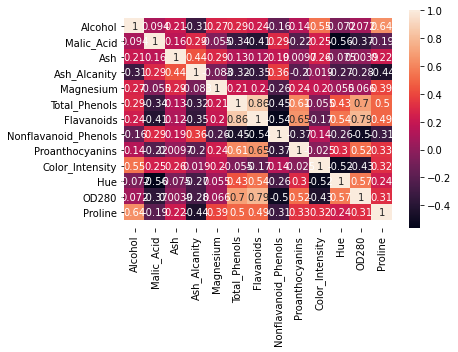

In [20]:
ax = sns.heatmap(df.corr(), annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

#### visualization using scatterplot for each pairing of the variables and histplot for the marginal plots along the diagonal

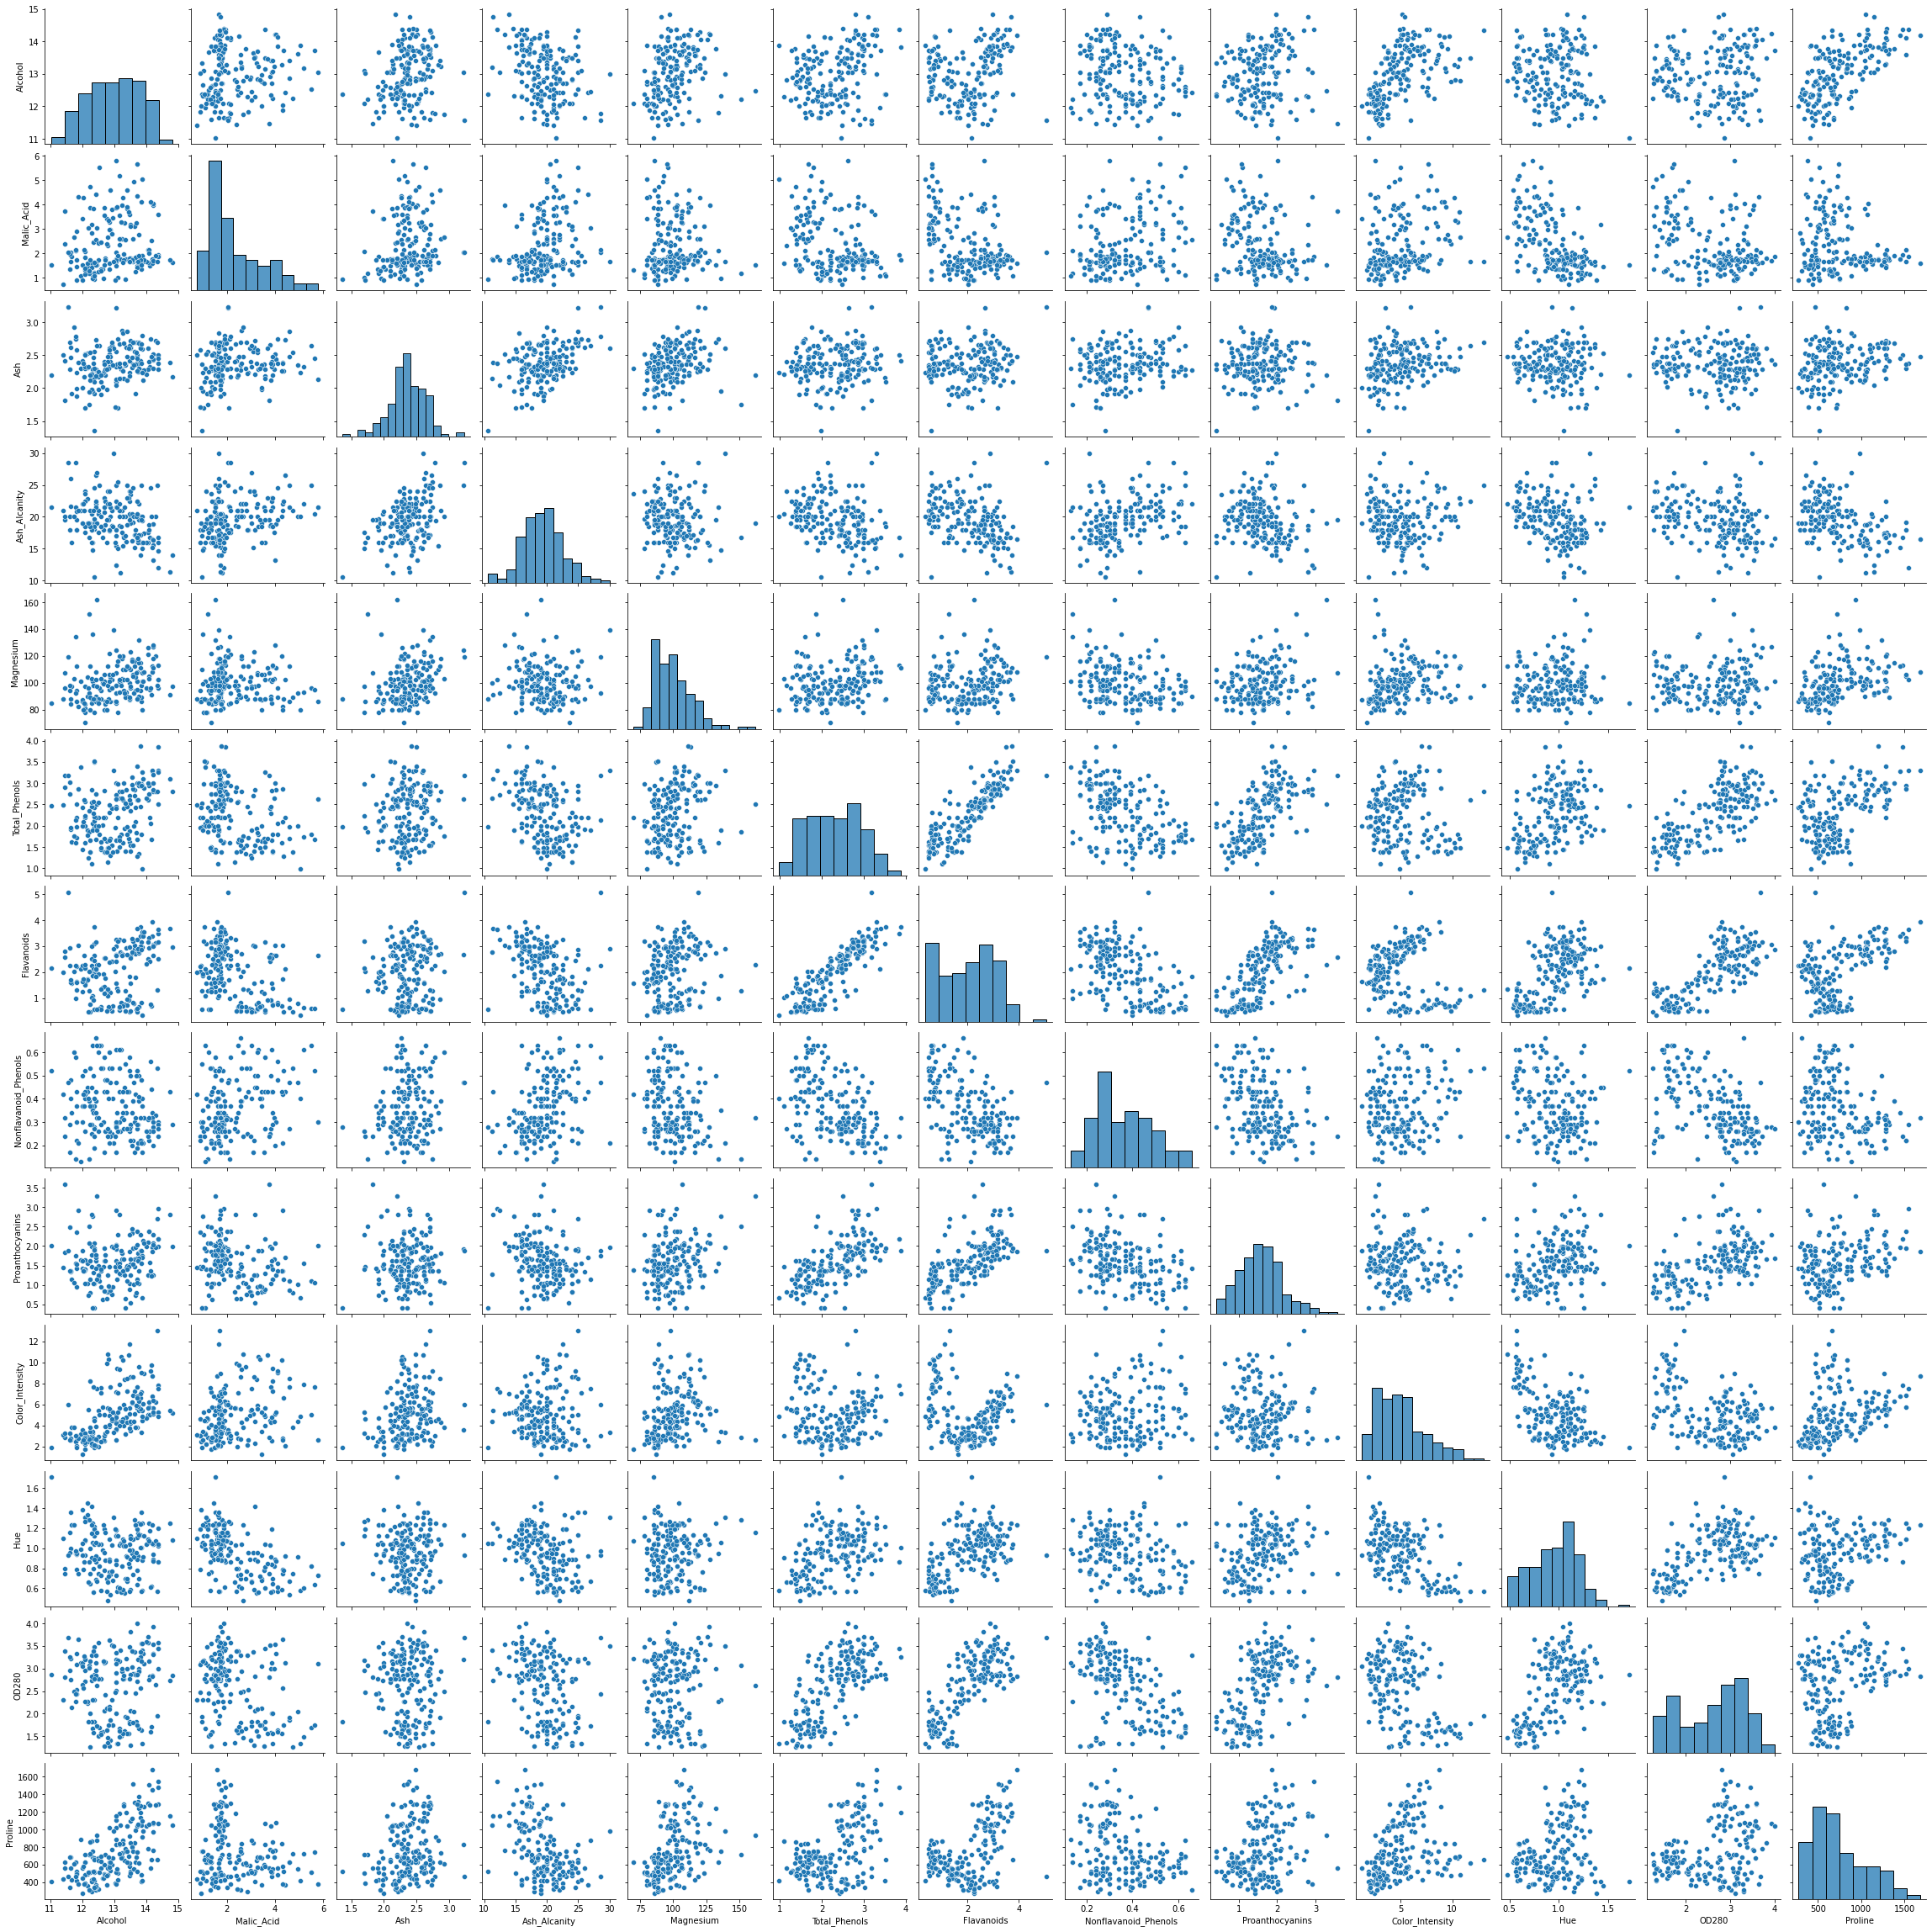

In [21]:
sns.pairplot(df)
plt.show()

### Detecting Multicollinearity with VIF

In [22]:
import statsmodels.api as sm
Xc = sm.add_constant(df)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF' : vif[1:]},index = df.columns)

,VIF
Alcohol,2.460372
Malic_Acid,1.656647
Ash,2.185448
Ash_Alcanity,2.238732
Magnesium,1.417855
Total_Phenols,4.334519
Flavanoids,7.029350
Nonflavanoid_Phenols,1.796380
Proanthocyanins,1.975683
Color_Intensity,3.026304


We need to apply PCA.

### Normalising the dataset using Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [28]:
dfs = ss.fit_transform(df)
dfs = pd.DataFrame(dfs)
dfs.columns = df.columns
dfs.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Applying PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA()

In [30]:
pca.fit(dfs)

PCA()

In [31]:
pd.DataFrame({'Eigen_Values' : pca.explained_variance_ , 'Proportion Explained' : pca.explained_variance_ratio_ , 
              'Cumulative proportion Explained' : np.cumsum(pca.explained_variance_ratio_)})

,Eigen_Values,Proportion Explained,Cumulative proportion Explained
0,4.732437,0.361988,0.361988
1,2.511081,0.192075,0.554063
2,1.454242,0.111236,0.665300
3,0.924166,0.070690,0.735990
4,0.858049,0.065633,0.801623
5,0.645282,0.049358,0.850981
6,0.554141,0.042387,0.893368
7,0.350466,0.026807,0.920175
8,0.290512,0.022222,0.942397
9,0.252320,0.019300,0.961697


In [61]:
pca = PCA(0.95)
df_pca = pca.fit_transform(dfs)
cols = list(dfs.columns)

### APPLYING K-MEANS CLUSTERING

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
kmeans = KMeans(random_state = 0)

In [38]:
wcss = []
sil_score = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_pca,kmeans.labels_))
print(wcss,'\n',sil_score)

[1570.4485793386373, 1189.6391379398017, 1088.3897621489696, 1027.1780274833766, 961.0909313367547, 909.4905236018138, 857.5340343392684, 808.1527995461562, 781.5392293821799, 747.3608200745075, 715.6887766380396, 684.2287875435612, 658.653632233721] 
 [0.2793321095556225, 0.29867482943692897, 0.27331919957819983, 0.22083942268968526, 0.20750393369382014, 0.20849727814565192, 0.14307247164889778, 0.15625386120097745, 0.15060302663885072, 0.15868429050367977, 0.15050558261884495, 0.15590608105913606, 0.1561492449027469]


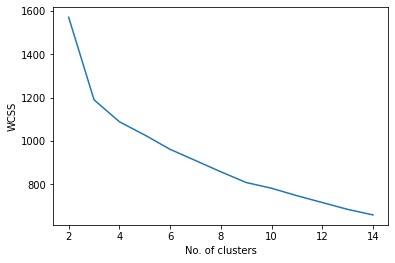

In [39]:
plt.plot(range(2,15),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

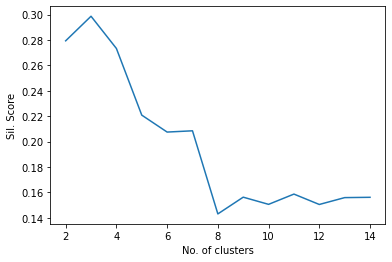

In [40]:
plt.plot(range(2,15),sil_score)
plt.xlabel('No. of clusters')
plt.ylabel('Sil. Score')
plt.show()

From these two diagrams above, we can take the number of clusters as 3.

In [43]:
kmeans = KMeans(n_clusters=3,n_init=15,random_state=0)
kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=15, random_state=0)

In [46]:
pd.Series(kmeans.labels_).value_counts()

0    65
1    62
2    51
dtype: int64

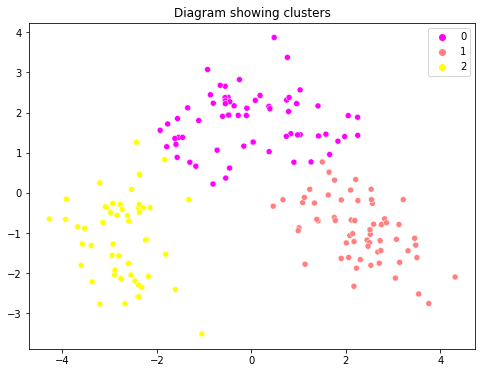

In [60]:
plt.figure(figsize=[8,6])
sns.scatterplot(x = df_pca[:,0],y = df_pca[:,1],hue=kmeans.labels_,palette = 'spring')
plt.title('Diagram showing clusters')
plt.show()

In [51]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,-0.036957,1.772239,0.186139,0.080240,0.070878,0.129806,-0.002327,-0.018015,0.032251,-0.023004
1,2.276194,-0.932054,0.001528,-0.135498,-0.134912,-0.218283,0.052110,0.024964,-0.050286,0.074679
2,-2.720036,-1.125651,-0.239093,0.062457,0.073676,0.099925,-0.060383,-0.007388,0.020027,-0.061468


As we can see, centeroids from both the PCs maintain a good distance from each other. So, Clusters are well-distinguishable.

In [53]:
df['labels'] = kmeans.labels_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [54]:
df.groupby('labels').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
labels,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


Now we can draw the conclusions as:

i)The Alcohol in cluster 1 is the largest.

ii)The Malic Acid in cluster 0 is the smallest.

iii)The Ash in cluster 1 is the largest.

iv)The Ash Alcanity in cluster 1 is the smallest and so on.